# Title : KNN Example - Iris 분류하기 

In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 오류 발생을 막아줌.

### Iris 데이터 불러오기, 전처리 

In [546]:
from sklearn.datasets import load_iris # sklearn와 seaborn에서 데이터를 가지고 올 수 있지만, dataframe 형식으로 반환되는 seaborn 사용

sk_iris = load_iris()

In [547]:
import seaborn as sns
iris = sns.load_dataset('iris') # seaborn으로 데이터를 불러온다.

In [548]:
X = iris.drop('species', axis = 1) # y에 해당하는 species를 제외하고 X를 구성한다.

In [549]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 문자를 0부터 시작하는 정수형 숫자로 바꿔줌

# train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 되는 것
y = le.fit_transform(iris['species'].values)

### EDA

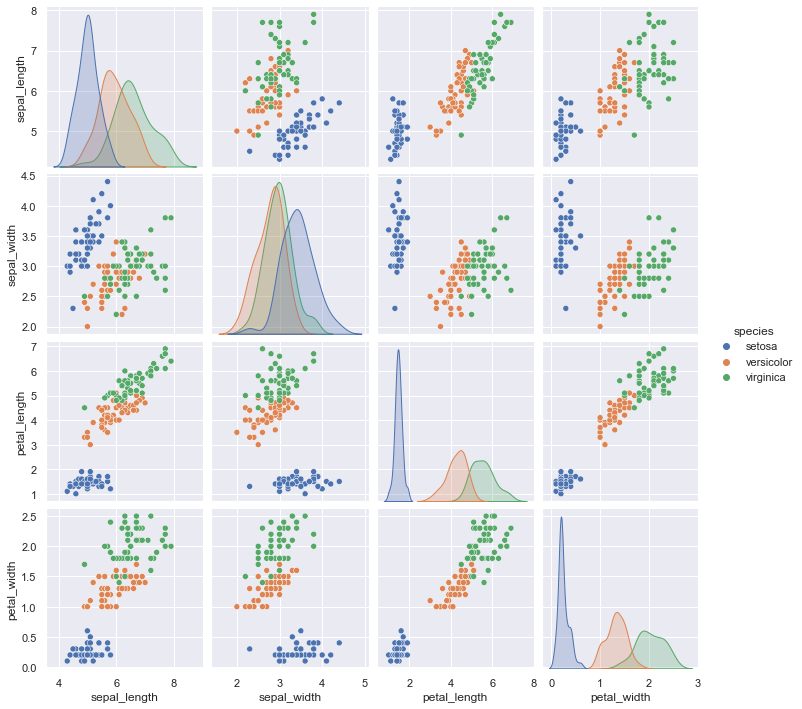

In [550]:
sns.pairplot(iris, hue = 'species', height = 2.5)
plt.show()

In [551]:
from sklearn.model_selection import train_test_split

[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

###  Feature Scaling

In [552]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # (X-υ)/σ
sc.fit(X_train)
X_train_std = sc.transform(X_train) # Training set 표준화, 
X_test_std = sc.transform(X_test)   # Test set 표준화

### Fitting

In [569]:
from sklearn.neighbors import KNeighborsClassifier # KNN

knn = KNeighborsClassifier(n_neighbors=10, p=2)

knn.fit(X_train_std, y_train)
y_train_pred = knn.predict(X_train_std)
print('Misclassified test samples: %d' %(y_train!=y_train_pred).sum())

Misclassified test samples: 3


### Validation Error 

In [570]:
y_test_pred = knn.predict(X_test_std)
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified test samples: 1


In [571]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accuracy
print("Accuracy :", str(round(accuracy_score(y_test, y_test_pred),4)*100) +"%")

Accuracy : 96.67%


In [572]:
conf = confusion_matrix(y_true=y_test, y_pred = y_test_pred)
print(conf)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [573]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Decision regions
#### 단, 표준화된 set과 표준화되지 않은 set을 비교하기 위해 데이터를 나누는 것부터 다시 시작하였습니다.

In [558]:
n_neighbor_range = range(1,30) # n_neighbor_range만큼 K의 변화 범위 설정

### Validation 하지 않은 경우 최적의 n_neighbors(K) 선택

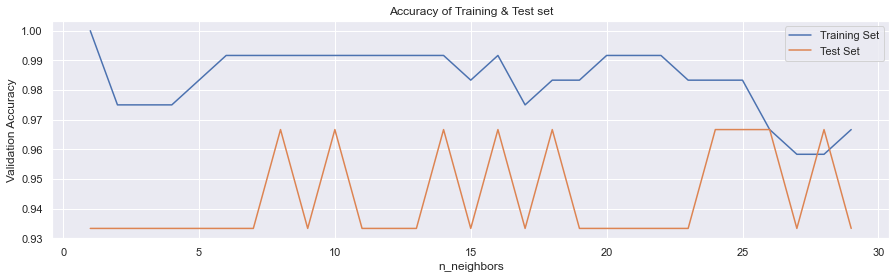

In [559]:
# Setting X, y
iris = sns.load_dataset('iris')
X = iris.drop('species', axis = 1)

le = LabelEncoder()
y = le.fit_transform(iris['species'].values)

# 랜덤하게 Train & Test을 나누는 작업
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

acc_train = []
acc_test = []

for k in n_neighbor_range: 
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    
    # Train Set을 학습시킨다.
    knn.fit(X_train, y_train)
    
    # Train set에서 오분류를 찾는다.
    y_train_pred = knn.predict(X_train)
    
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))

plt.figure(figsize = (15,4))
plt.plot(n_neighbor_range, acc_train, label = "Accuracy of Training Set")
plt.plot(n_neighbor_range, acc_test,  label = "Accuracy of Test Set")
plt.title("Accuracy of Training & Test set")
plt.xlabel("n_neighbors")
plt.ylabel("Validation Accuracy")
plt.legend(['Training Set', 'Test Set'])
plt.show();

#### => Test Set에서 높은 Accuracy를 가지는 n_neighbors 중 , Training Set에서 또한 높은 Accuarcy를 가지는 10을 K로 설정

### 위의 결과를 바탕으로 각 독립변수 간 관계를 2차원 평면에 나타냄

In [574]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)
knn = KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Accuracy_score : ' + str(round(accuracy_score(y_test, y_test_pred)*100,2))+'%')
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())
print('Confusion_matrix :')
print(confusion_matrix(y_true=y_test, y_pred = y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)

Accuracy_score : 96.67%
Misclassified test samples: 1
Confusion_matrix :
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



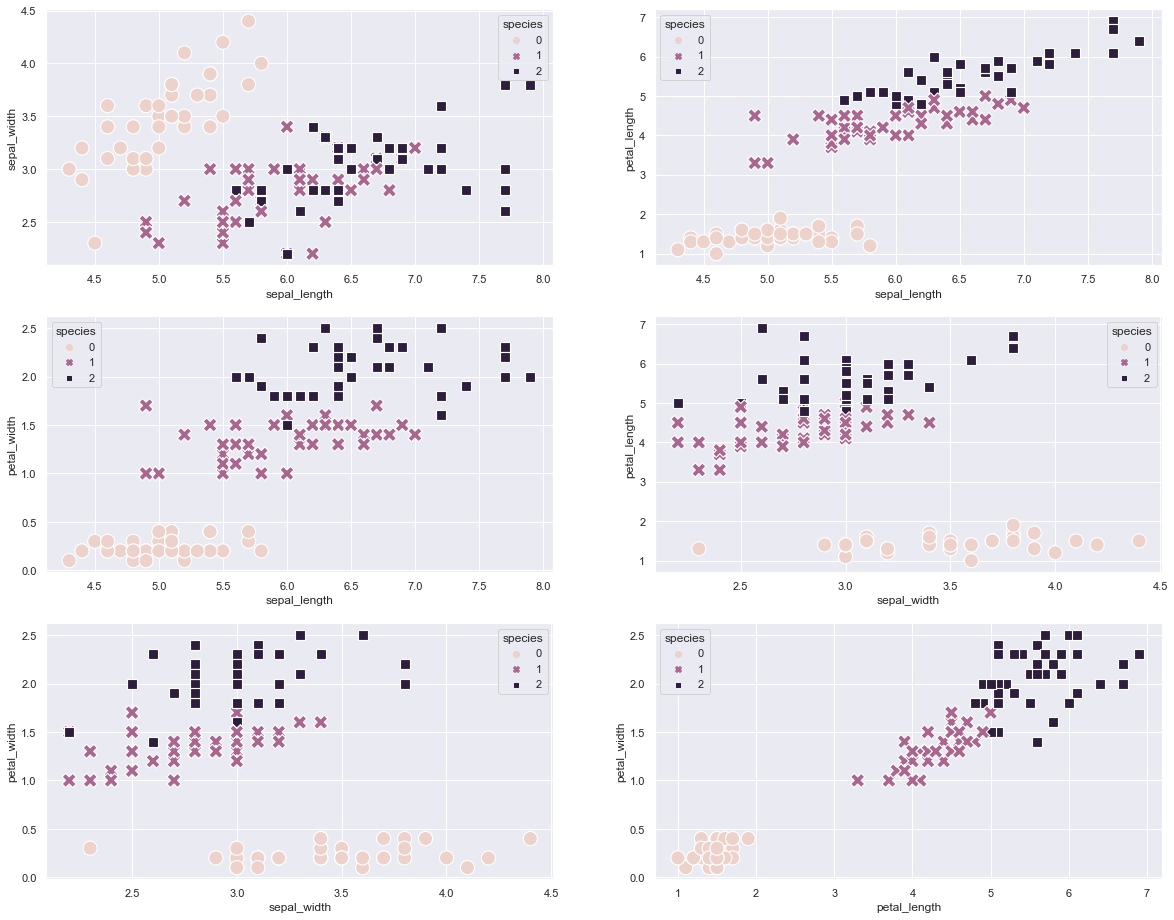

In [561]:
iris_dataframe = pd.DataFrame(X_train, columns=X.columns)
iris_dataframe['species'] = y_train_pred

sns.set(rc = {'figure.figsize':(20,16)})
a = 0
for i in range(3):
    for j in range(i+1,4):
        a+=1
        sns.scatterplot(x=iris_dataframe.columns[i], 
                        y=iris_dataframe.columns[j], 
                        hue='species', # different colors by group
                        style='species', # different shapes by group
                        s=200, # marker size
                        data=iris_dataframe,
                        ax = plt.subplot(3,2,a),
                        )

### Validation 하지 않은 경우 최적의 n_neighbors(K) 선택

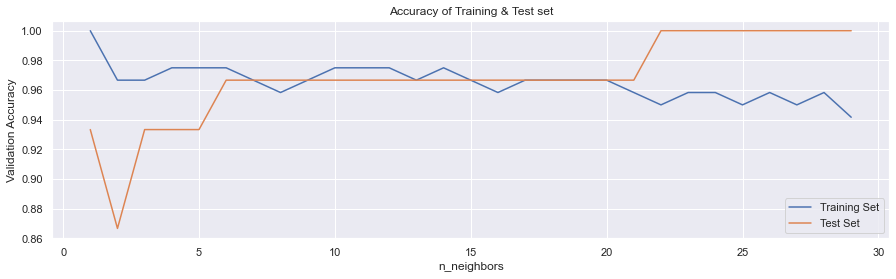

In [562]:
# Setting X, y
iris = sns.load_dataset('iris')
X = iris.drop('species', axis = 1)

le = LabelEncoder()
y = le.fit_transform(iris['species'].values)

# 랜덤하게 Train & Test을 나누는 작업
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

sc = StandardScaler() # (X-υ)/σ
sc.fit(X_train)
X_train = sc.transform(X_train) # Training set 표준화, 
X_test = sc.transform(X_test)   # Test set 표준화

acc_train = []
acc_test = []

for k in n_neighbor_range: # n_neighbor_range만큼 K의 변화에 따른 성능 시각화
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    
    # Train Set을 학습시킨다.
    knn.fit(X_train, y_train)
    
    # Train set에서 오분류를 찾는다.
    y_train_pred = knn.predict(X_train)
    
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))

plt.figure(figsize = (15,4))
plt.plot(n_neighbor_range, acc_train, label = "Accuracy of Training Set")
plt.plot(n_neighbor_range, acc_test,  label = "Accuracy of Test Set")
plt.title("Accuracy of Training & Test set")
plt.xlabel("n_neighbors")
plt.ylabel("Validation Accuracy")
plt.legend(['Training Set', 'Test Set'])
plt.show();

#### => Test Set에서 높은 Accuracy를 가지는 n_neighbors 중 , Training Set에서 또한 높은 Accuarcy를 가지는 10을 K로 설정

In [575]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.2, random_state = 777, stratify = y)

# 표준화 작업
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Accuracy_score : ' + str(round(accuracy_score(y_test, y_test_pred)*100,2))+'%')
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())
print('Confusion_matrix :')
print(confusion_matrix(y_true=y_test, y_pred = y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)

Accuracy_score : 96.67%
Misclassified test samples: 1
Confusion_matrix :
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 위의 결과를 바탕으로 각 독립변수 간 관계를 2차원 평면에 나타냄

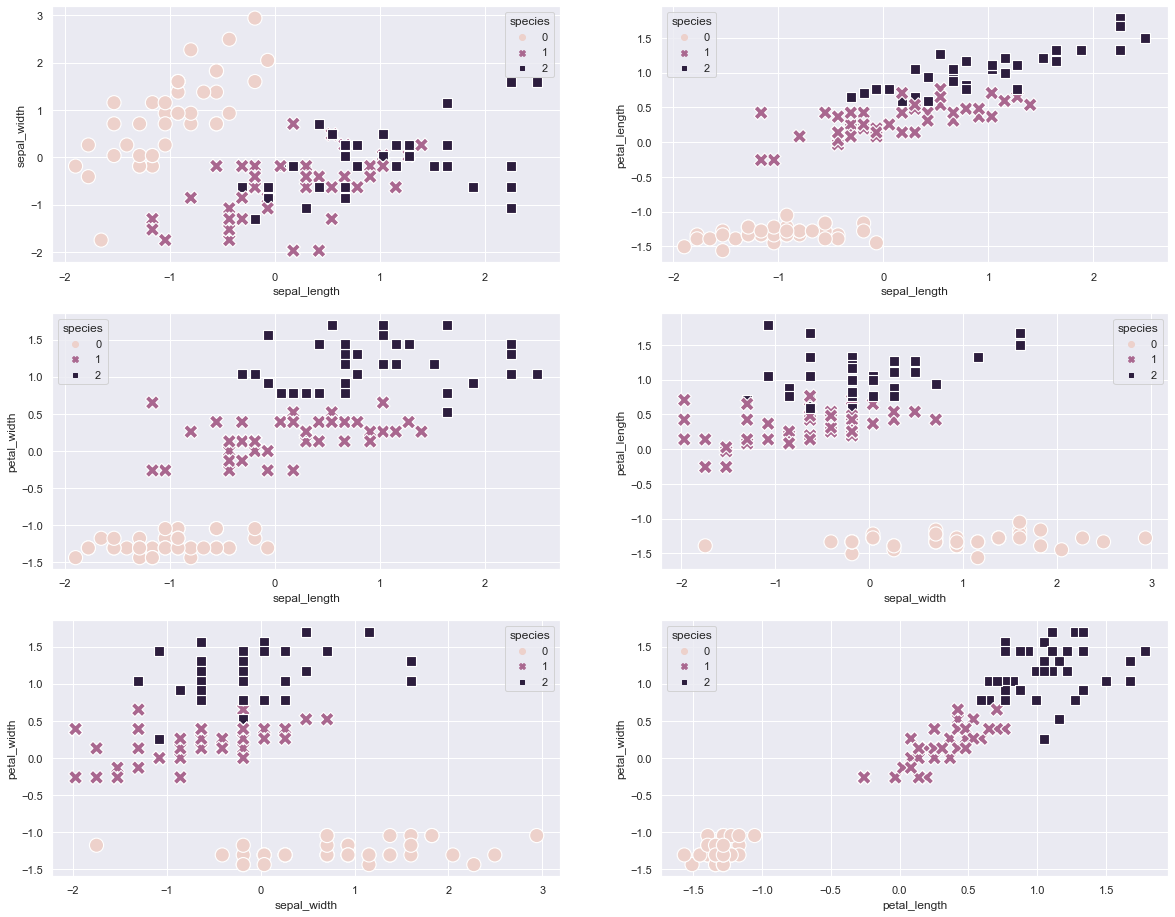

In [564]:
iris_dataframe = pd.DataFrame(X_train, columns=X.columns)
iris_dataframe['species'] = y_train_pred

sns.set(rc = {'figure.figsize':(20,16)})
a = 0
for i in range(3):
    for j in range(i+1,4):
        a+=1
        sns.scatterplot(x=iris_dataframe.columns[i], 
                        y=iris_dataframe.columns[j], 
                        hue='species', # different colors by group
                        style='species', # different shapes by group
                        s=200, # marker size
                        data=iris_dataframe,
                        ax = plt.subplot(3,2,a),
                        )


### 스케일링 하지 않은 데이터로 다시 해보기

In [565]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [566]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Misclassified training samples : %d' %(y_train!=y_train_pred).sum())
print('Misclassified test samples : %d' %(y_test!=y_test_pred).sum())

Misclassified training samples : 3
Misclassified test samples : 1


In [567]:
print('Accuracy_score : ' + str(round(accuracy_score(y_test, y_test_pred)*100,2))+'%')

Accuracy_score : 96.67%


In [568]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(conf)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
